In [2]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

In [3]:
# Create data for AND gate
data = [[0,0], [0,1], [1,0], [1,1]]

# Create labels for outputs of AND gate
labels = [0,0,0,1]

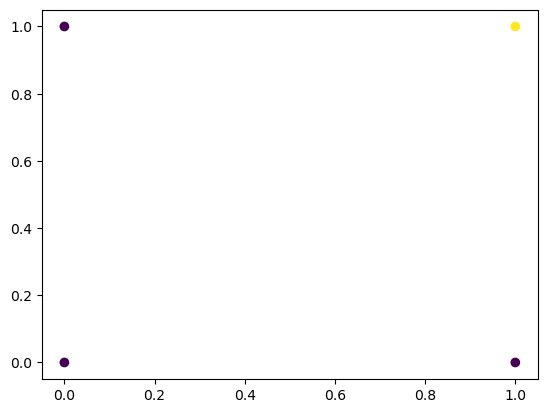

In [4]:
# Scatter plot of data
x_data = [point[0] for point in data]
y_data = [point[1] for point in data]

plt.scatter(x=x_data, y=y_data, c=labels)
plt.show()

In [5]:
# Create perceptron object
classifier = Perceptron(max_iter=40, random_state=22)

# Train the model
classifier.fit(data, labels)

# Score the model
classifier.score(data, labels)

1.0

In [6]:
# Change the labels to match an OR gate
or_labels = [0,1,1,1]

# Train the model
classifier.fit(data, or_labels)

# Score the model
classifier.score(data, or_labels)

1.0

In [7]:
# Investigating the classifier's decision method
print(classifier.decision_function([[0, 0], [1, 1], [0.5, 0.5]]))

# [0,0] is closer to the decision boundary than [1,1]

[-1.  3.  1.]


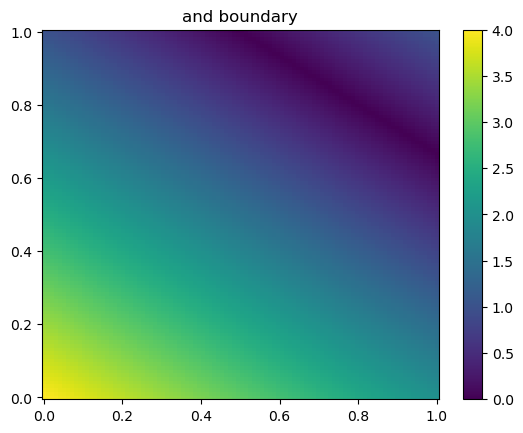

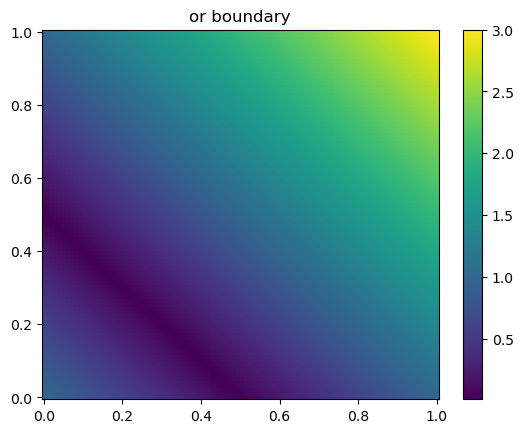

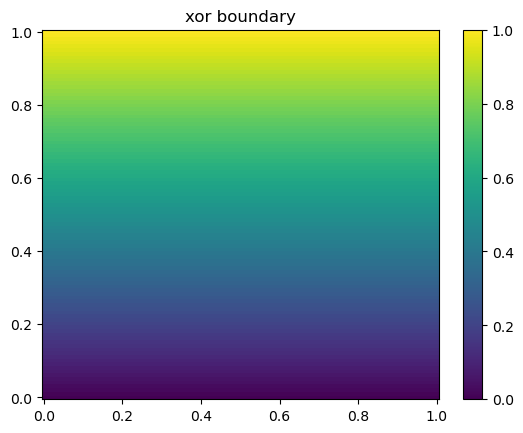

In [22]:
# Visualizing the decision boundary

# Create list of values for .decision_function() input
x_values = np.linspace(0,1,100)
y_values = np.linspace(0,1,100)

# Create combination of every possible x and y value
point_grid = list(product(x_values, y_values))

# Dictionary of labels
labels_dict = {'and':[0,0,0,1], 'or':[0,1,1,1], 'xor':[0,1,1,0]}

# Iterate through different labels to visualize decision bounaries
for key, value in labels_dict.items():
    # Fit classifier
    classifier.fit(data, value)
    
    # Call decision_function on point_grid
    distances = classifier.decision_function(point_grid)

    # Convert distances to absolute values
    abs_distances = [abs(x) for x in distances]

    # Convert abs_distances into a 2 x 2 list
    distances_matrix = np.reshape(abs_distances, (100,100))

    # Create heatmap
    heatmap = plt.pcolormesh(x_values, y_values, distances_matrix)
    plt.colorbar(heatmap)
    plt.title(f'{key} boundary')
    plt.show()